# Kernels for hand-made SVM

**In this homework we will again look at SVM kernels and will write and test rbf kernel for our own implementation.**

In [ ]:
'''
If you are using Google Colab, uncomment the next line to download `svm.py`
You can open and change downloaded `.py` files in Colab using the "Files" sidebar on the left.
'''
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/assignment0_03_svm/svm.py 

In [113]:
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import accuracy_score

In [114]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for our SVM class"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.predict(xy).reshape(X.shape)
    # plot decision boundary and margins
    CS = ax.contourf(X, Y, P, origin='lower', cmap='autumn', alpha=0.1)
    plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [115]:
from sklearn.datasets import make_circles

from sklearn.svm import SVC # "Support vector classifier"

X, y = make_circles(150, factor=.1, noise=.1, random_state=42)

X_test, y_test = X[100:], y[100:]
X, y = X[:100], y[:100]

### Sklearn realization:

Test accuracy:  0.64


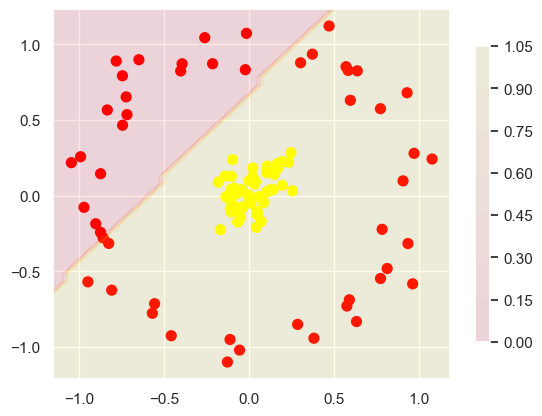

In [116]:
clf = SVC(kernel='linear').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Test accuracy:  1.0


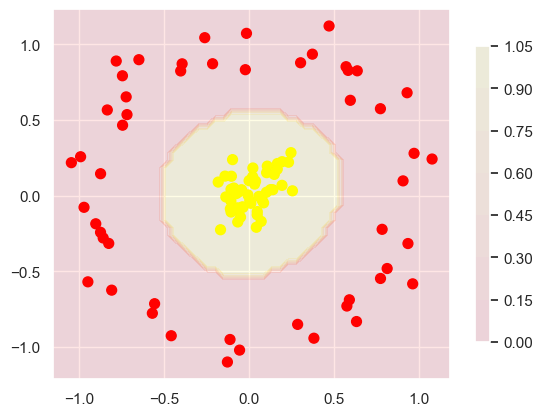

In [117]:
clf = SVC(kernel='rbf').fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Let's look at our realization

### You need to open svm.py file and add all missed lines.

Linear SVM __primal__ optimization problem can be formulated as

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w X_i - b)) + \lambda ||w||_2 \to \min_w $$

This problem can be solved with gradient or sub-gradien methods.

-----
Whereas __dual__ optimization problem formulates as follows:

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (X_i \cdot X_j ) y_j c_j \to \max_{c_1,...,c_n} \\ \text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

Where $W = \sum_{i=1}^n c_i y_i X_i$.

In this quadratic optimization problem we can use kernel trick: <br/>
introduce fucntion $K(X_i, X_j) = \phi (X_i) \phi (X_j)$ and change dot products in our optimization problem

Then we have 

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(X_i, X_j) y_j c_j \to \max_{c_1,...,c_n} \\
\text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

$W = \sum_{i=1}^n c_i y_i \phi(X_i)$

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

----
However primal optimization problem with kernels can be formulated like (see [Olivier Chapelle, 2006](https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf)):

$$f(x) = \sum_{i=1}^n \beta_i K(x_i, x)$$

$$K: K_{i,j} = K(x_i, x_j)$$

$$ \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \to \min_{\vec{\beta}}$$

where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = \max(0, 1 - y_i (K_i^T \vec{\beta}))$

#### Radial basis function kernel.

####  The RBF kernel on two samples x and x', represented as feature vectors in some input space, is defined as:

## $K(x,x') = \exp \big{[}- \frac{||x-x'||^2}{2 \sigma^2} \big{]}.$

### Let's look how it works:

In [118]:
from svm import SVM, rbf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
y[y==0] = -1 # for convenience with formulas
y_test[y_test==0] = -1

Epoch 0, Loss: 0.3200112819671631
Epoch 1, Loss: 0.39459894597530365
Epoch 2, Loss: 0.2873794764280319
Test accuracy:  0.72


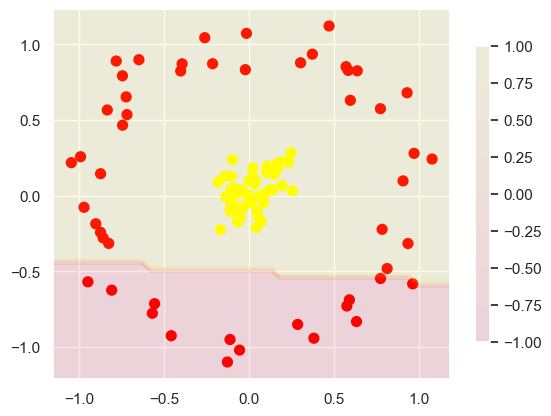

In [120]:
clf = SVM(epochs=3, lr=1, batch_size=20, verbose=True)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [121]:
X_test.shape

(50, 2)

Epoch 0, Loss: 0.23817493319511412
Epoch 1, Loss: 0.22772106528282166
Epoch 2, Loss: 0.2652175098657608
Epoch 3, Loss: 0.22303431630134582
Epoch 4, Loss: 0.21068682074546813
Epoch 5, Loss: 0.24893408864736558
Epoch 6, Loss: 0.20981186330318452
Epoch 7, Loss: 0.16186345964670182
Epoch 8, Loss: 0.20231761783361435
Epoch 9, Loss: 0.17966853380203246
Epoch 10, Loss: 0.18739363700151443
Epoch 11, Loss: 0.17923997044563295
Epoch 12, Loss: 0.12756758630275727
Epoch 13, Loss: 0.1571122631430626
Epoch 14, Loss: 0.13964451998472213
Epoch 15, Loss: 0.15581151992082595
Epoch 16, Loss: 0.20715612173080444
Epoch 17, Loss: 0.18401753455400466
Epoch 18, Loss: 0.14673980176448823
Epoch 19, Loss: 0.12290196865797043
Epoch 20, Loss: 0.14906398579478264
Epoch 21, Loss: 0.1673896498978138
Epoch 22, Loss: 0.14510667733848095
Epoch 23, Loss: 0.07389453686773777
Epoch 24, Loss: 0.15181670039892198
Epoch 25, Loss: 0.1628013402223587
Epoch 26, Loss: 0.08114575278013944
Epoch 27, Loss: 0.1186207577586174
Epoch 2

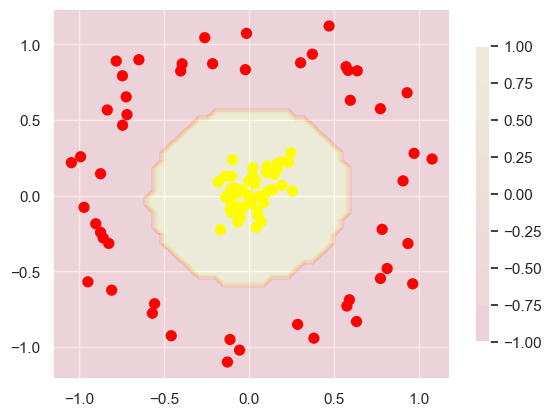

In [125]:
clf = SVM(epochs=100, lr=0.1, batch_size=20, verbose=True, kernel_function=rbf)
clf.fit(X, y)
pred = clf.predict(X_test)
print("Test accuracy: ", accuracy_score(y_test, pred))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [126]:
assert accuracy_score(y_test, pred) > 0.95

## Our model with rbf kernel can learn this dataset too.